In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import scipy
from scipy.stats.mstats import winsorize
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
discreptive_ex_0 = pd.read_excel('Summary Cleaned.xlsx')
discreptive_ex_BW = pd.read_excel('Summary Cleaned.xlsx')
table_three = pd.read_excel('Europe_3_Factors.xlsx')
table_one = pd.read_excel('Europe_MOM_Factor.xlsx')
#read the summary, firsty clean the Investment Type, only Open-End Fund reamin

In [3]:
#run the winsorize on Flow, Return and Sustainability
def winsorize_removeString(array, left_limit, right_limit):
    
    nan = []
    an = []
    order = []
    a = 0
    array_expand = []
    a_win = [0.0] * len(array)
    
    for i in range(len(array)):
        if array[i] == 0:
            nan.append(i)
        else:
            array_expand.append(array[i])
            an.append(i)
            order.append(a)
            a += 1
    
    a_winex = scipy.stats.mstats.winsorize(array_expand, limits=[left_limit, right_limit])
    
    for x,y in zip(an, range(len(an))):
        a_win[x] = a_winex[y]
    
    
    return a_win

fund_flow = discreptive_ex_0['Fund Flow']
fund_return = discreptive_ex_0['Fund Return']
fund_sus = discreptive_ex_0['Fund Sustainability']

flow_win = winsorize_removeString(fund_flow, 0.01, 0.01)
return_win = winsorize_removeString(fund_return, 0.01, 0.01)
sus_win = winsorize_removeString(fund_sus, 0.01, 0.01)

for i in range(len(flow_win)):
    discreptive_ex_0.at[i, 'Fund Flow'] = flow_win[i]
    discreptive_ex_0.at[i, 'Fund Return'] = return_win[i]
    discreptive_ex_0.at[i, 'Fund Sustainability'] = sus_win[i]

In [ ]:
discreptive_ex_0.to_excel("PreRegression.xlsx")

In [4]:
fund_size = discreptive_ex_0['Fund Size']
fund_size_log = np.log10(fund_size)

#run the winsorize on Flow, Return and Sustainability
def winsorize_removeInf(array, left_limit, right_limit):
    
    nan = []
    an = []
    order = []
    a = 0
    array_expand = []
    a_win = [-np.inf] * len(array)
    
    for i in range(len(array)):
        if array[i] == -np.inf:
            nan.append(i)
        else:
            array_expand.append(array[i])
            an.append(i)
            order.append(a)
            a += 1
    
    a_winex = scipy.stats.mstats.winsorize(array_expand, limits=[left_limit, right_limit])
    
    for x,y in zip(an, range(len(an))):
        a_win[x] = a_winex[y]
    
    
    return a_win

fund_size_log_win = winsorize_removeInf(fund_size_log, 0.01, 0.01)

fund_size_win = [10**fund_size_log[i] for i in range(len(fund_size_log_win))]

for i in range(len(flow_win)):
    discreptive_ex_0.at[i, 'Fund Size'] = fund_size_log_win[i]

/home/yuxuan/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
#fill all 0 value with NaN
cols = ["Fund Size","Fund Flow","Fund Return","Fund Sustainability"]
discreptive_ex_0[cols] = discreptive_ex_0[cols].replace({0:np.nan})
discreptive_ex_BW[cols] = discreptive_ex_BW[cols].replace({0:np.nan})

In [ ]:
average_AW = discreptive_ex_0.groupby('FundId')[cols].mean()
average_BW = discreptive_ex_BW.groupby('FundId')[cols].mean()

In [ ]:
#table_three.std()
#table_three.min()
#table_three.max()
#table_one.mean()
#table_one.std()
#table_one.min()
#table_one.max()
table_three.mean()

In [ ]:
#Before Winsorize
average_value_BW = discreptive_ex_BW[cols].mean()
standard_deviation_BW = discreptive_ex_BW[cols].std()
min_value_BW = discreptive_ex_BW[cols].min()
max_value_BW = discreptive_ex_BW[cols].max()

#After Winsorize
average_value_AW = discreptive_ex_0[cols].mean()
standard_deviation_AW = discreptive_ex_0[cols].std()
min_value_AW = discreptive_ex_0[cols].min()
max_value_AW = discreptive_ex_0[cols].max()

In [ ]:
average_value_BW

In [ ]:
standard_deviation_BW

In [ ]:
min_value_BW

In [ ]:
max_value_BW

In [ ]:
average_value_AW

In [ ]:
standard_deviation_AW

In [ ]:
min_value_AW

In [ ]:
max_value_AW

In [ ]:
discreptive_size_dropna = discreptive_ex_0['Fund Size'].dropna()
fund_size_dropna = discreptive_size_dropna
size_skew = skew(fund_size_dropna)
size_kurtosis = kurtosis(fund_size_dropna)
print(size_skew)
print(size_kurtosis)

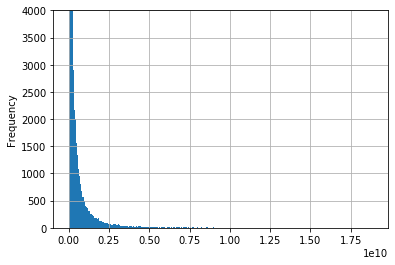

In [23]:
hist_size = discreptive_ex_BW['Fund Size'].plot.hist(bins=1000,ylim=(0,4000),grid=True)
fig = hist_size.get_figure()
fig.savefig('hist_size.svg')

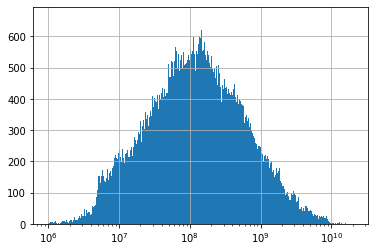

In [25]:
col_size = discreptive_ex_BW['Fund Size'].tolist()
MIN, MAX = 1000000.0, 20000000000.0
pl.figure()
pl.hist(col_size, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 1000))
pl.gca().set_xscale("log")
pl.grid()
#pl.show()
pl.savefig('hist_size_log.svg')

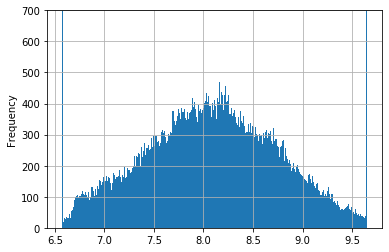

In [26]:
hist_size_win = discreptive_ex_0[discreptive_ex_0['Fund Size']>-np.inf]["Fund Size"].plot.hist(bins=1000,ylim=(0,700),grid=True)
fig = hist_size_win.get_figure()
fig.savefig('hist_size_AW.svg')

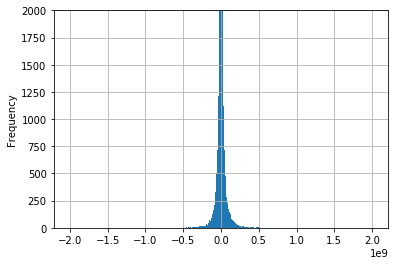

In [27]:
hist_flow_BW = discreptive_ex_BW['Fund Flow'].plot.hist(bins=1000,ylim=(0,2000),grid=True)
fig = hist_flow_BW.get_figure()
fig.savefig('hist_flow_BW.svg')

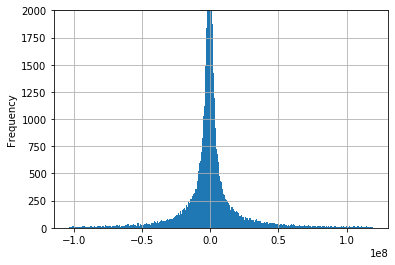

In [28]:
hist_flow_AW = discreptive_ex_0['Fund Flow'].plot.hist(bins=1000,ylim=(0,2000),grid=True)
fig = hist_flow_AW.get_figure()
fig.savefig('hist_flow_AW.svg')

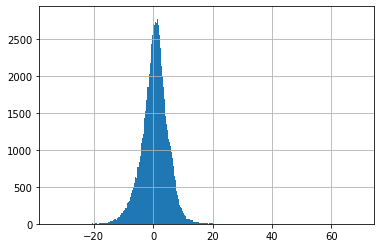

In [29]:
hist_return_BW = discreptive_ex_BW['Fund Return'].hist(bins=1000)
fig = hist_return_BW.get_figure()
fig.savefig('hist_return_BW.svg')

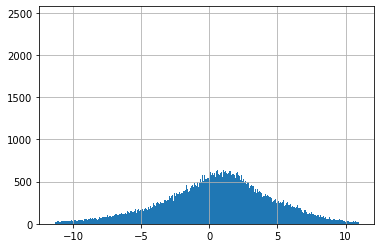

In [30]:
hist_return_AW = discreptive_ex_0['Fund Return'].hist(bins=1000)
fig = hist_return_AW.get_figure()
fig.savefig('hist_return_AW.svg')

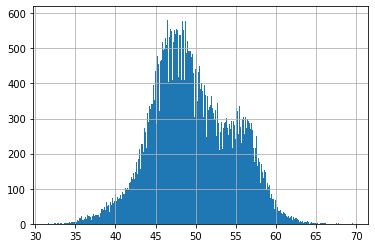

In [31]:
hist_sus_BW = discreptive_ex_BW['Fund Sustainability'].hist(bins=1000)
fig = hist_sus_BW.get_figure()
fig.savefig('hist_sus_BW.svg')

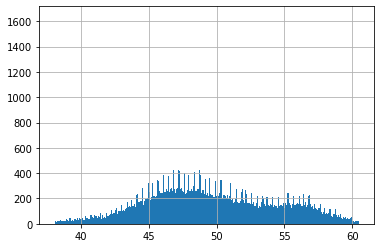

In [32]:
hist_sus_AW = discreptive_ex_0['Fund Sustainability'].hist(bins=1000)
fig = hist_sus_AW.get_figure()
fig.savefig('hist_sus_AW.svg')

In [ ]:
smaller_7 = average[average['Fund Size'] < 10000000]

larger_7 = average[average['Fund Size'] >= 10000000]
ten_hundred = larger_7[larger_7['Fund Size'] < 100000000]

larger_8 = average[average['Fund Size'] >= 100000000]
hundred_thousend = larger_8[larger_8['Fund Size'] < 1000000000]

larger_9 = average[average['Fund Size'] >= 1000000000]
thousend_tenthousend = larger_9[larger_9['Fund Size'] < 10000000000]

larger_10 = average[average['Fund Size'] >= 10000000000]
tenthousend_hundredthousend = larger_10[larger_10['Fund Size'] < 100000000000]

larger_11 = average[average['Fund Size'] >= 100000000000]

In [ ]:
discreptive_capm = pd.read_excel("AfterRegression.xlsx")

In [ ]:
cols2 = ["Fund Size","Fund Flow","Fund Return","Fund Sustainability",'CAPM Performance', 'Performance Three Factor', 'Performance Four Factor']
discreptive_capm[cols2] = discreptive_capm[cols2].replace({0:np.nan})
average_capm = discreptive_capm.groupby('FundId')[cols2].mean()

In [ ]:
discreptive_dropna = discreptive_capm[cols2].dropna()

In [ ]:
discreptive_dropna

In [ ]:
sus_med = discreptive_dropna["Fund Sustainability"].median()
low_sus = discreptive_dropna[discreptive_capm['Fund Sustainability'] < sus_med]
high_sus = discreptive_dropna[discreptive_capm['Fund Sustainability'] > sus_med]

In [ ]:
low_sus[cols2].mean()

In [ ]:
high_sus[cols2].mean()

In [ ]:
def t_test(mean_high, std_high, mean_low, std_low, amount):
    
    rvs_high = stats.norm.rvs(loc=mean_high, scale=std_high, size=amount)
    rvs_low = stats.norm.rvs(loc=mean_low, scale=std_low, size=amount)
    
    t_test = stats.ttest_ind(rvs_high, rvs_low, equal_var = False)
    
    return t_test

In [ ]:
#size t_test
t_test_size = t_test(high_sus['Fund Size'].mean(), high_sus['Fund Size'].std(), low_sus['Fund Size'].mean(), high_sus['Fund Size'].std(), )

In [ ]:
#regression between ESG score and Performance
sus = discreptive_dropna['Fund Sustainability'].tolist()
performance_1 = discreptive_dropna['CAPM Performance'].tolist()
performance_3 = discreptive_dropna['Performance Three Factor'].tolist()
performance_4 = discreptive_dropna['Performance Four Factor'].tolist()

polynom_1 = np.polyfit(sus, performance_1, 1)
polynom_3 = np.polyfit(sus, performance_3, 1)
polynom_4 = np.polyfit(sus, performance_4, 1)